# Web Scraping and Data Cleaning

---

## Web scraping and analysis

We will use a package called `BeautifulSoup` to collect the data from the web. 

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I flew from Malaga via LHR to...
1,✅ Trip Verified | Milan to Miami return via L...
2,✅ Trip Verified | BA created a new low-cost s...
3,✅ Trip Verified | I flew with British Airway...
4,✅ Trip Verified | Manchester to Copenhagen vi...


In [5]:
df.to_csv("BA_reviews.csv")

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [24]:
# Load the data
df = pd.read_csv("BA_reviews.csv")

# Example of cleaning text by removing "Not Verified" and "✅ Trip Verified"
df.reviews= df.reviews.str.split('|',expand=True)[1]

# Optional: further cleaning steps
# Remove newline characters, excessive spaces, etc.
df['reviews'] = df['reviews'].str.replace("\n", " ", regex=False).str.strip()
df['reviews'] = df['reviews'].str.replace(" +", " ", regex=True)  # Replace multiple spaces with a single space

# Save the cleaned data
df.to_csv("clean_BA_reviews.csv", index=False)

In [5]:
df = pd.read_csv("clean_BA_reviews.csv")

In [6]:
df.head(15)

,Unnamed: 0,reviews
0,0,I flew from Malaga via LHR to Boston on the 4t...
1,1,Milan to Miami return via London. Worst busine...
2,2,BA created a new low-cost subsidiary in BA Eur...
3,3,I flew with British Airways from Heathrow to H...
4,4,Manchester to Copenhagen via London on 30th Ap...
5,5,I have never seen such disrespect to a custome...
6,6,Paid for a 14 hour long flight ticket which in...
7,7,Very inconsiderate PA announcements were made ...
8,8,"Absolutely terrible, lost my luggage on both f..."
9,9,We booked premium economy round trip from Phoe...


In [7]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure necessary resources are downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\likit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\likit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\likit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\likit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\likit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
# Define a function for cleaning and preprocessing text
def clean_text(text):
    # Normalize text to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Tokenize text
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Perform POS tagging
    tagged_words = pos_tag(words)
    # Lemmatization based on POS tags
    lemmatizer = WordNetLemmatizer()
    pos_map = {
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV,
        'J': wordnet.ADJ
    }
    words = [lemmatizer.lemmatize(word, pos=pos_map.get(tag[0], wordnet.NOUN)) for word, tag in tagged_words]
    # Join words back into a string
    return ' '.join(words)

# Clean the reviews in the DataFrame
df['reviews_cleaned'] = df['reviews'].apply(clean_text)


In [9]:
df.head()

,Unnamed: 0,reviews,reviews_cleaned
0,0,I flew from Malaga via LHR to Boston on the 4t...,flew malaga via lhr boston 4th may 2024 arriva...
1,1,Milan to Miami return via London. Worst busine...,milan miami return via london bad business cla...
2,2,BA created a new low-cost subsidiary in BA Eur...,ba create new lowcost subsidiary ba euroflyer ...
3,3,I flew with British Airways from Heathrow to H...,flew british airway heathrow hannover although...
4,4,Manchester to Copenhagen via London on 30th Ap...,manchester copenhagen via london 30th april 20...


In [10]:
# Sentiment Analysis with VADER
sia = SentimentIntensityAnalyzer()
df['sentiments'] = df['reviews_cleaned'].apply(lambda x: sia.polarity_scores(x))
df['compound'] = df['sentiments'].apply(lambda x: x['compound'])
df['sentiment_type'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [11]:
# Output the DataFrame to view results
print(df[['reviews', 'sentiment_type', 'compound']].head())

                                             reviews sentiment_type  compound
0  I flew from Malaga via LHR to Boston on the 4t...       negative   -0.7184
1  Milan to Miami return via London. Worst busine...       negative   -0.9036
2  BA created a new low-cost subsidiary in BA Eur...       positive    0.9865
3  I flew with British Airways from Heathrow to H...       negative   -0.8992
4  Manchester to Copenhagen via London on 30th Ap...       positive    0.3818


In [12]:
# Summary of sentiments
sentiment_summary = df['sentiment_type'].value_counts()

print(sentiment_summary)

positive    568
negative    427
neutral       5
Name: sentiment_type, dtype: int64


In [13]:
from sklearn.decomposition import NMF
# TF-IDF Vectorization
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=3, max_df=0.90)
dtm = tfidf_vect.fit_transform(df['reviews_cleaned'])

# Topic Modeling with Non-Negative Matrix Factorization (NMF)
nmf_model = NMF(n_components=5, random_state=0)
nmf_output = nmf_model.fit_transform(dtm)

# Display topics function
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display topics
display_topics(nmf_model, tfidf_vect.get_feature_names_out(), 10)


C:\Users\likit\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


Topic 0:
good crew flight cabin food ba drink service seat club
Topic 1:
cancel flight book refund ba voucher customer day customer service tell
Topic 2:
class business business class seat economy middle middle seat row pay class seat
Topic 3:
hour delay flight luggage bag airport arrive wait plane staff
Topic 4:
british british airway airway airline customer service customer service bad fly experience


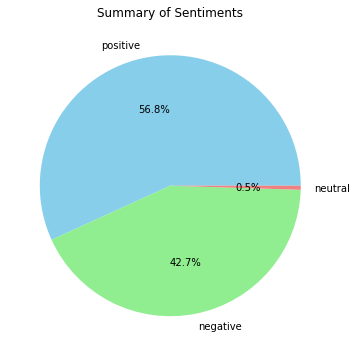

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_summary, labels=sentiment_summary.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Summary of Sentiments')
plt.show()

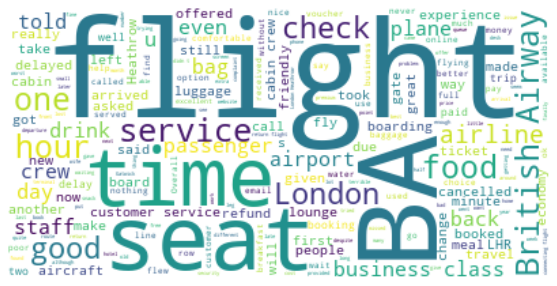

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Generate a word cloud image
text = " ".join(review for review in df.reviews.dropna())
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()